# `automaton`.`synchronizing_word`(_`algo`_)

See also:
- [automaton.pair](automaton.pair.ipynb)
- [context.cerny](context.cerny.ipynb)

In [1]:
import vcsn
c = vcsn.context('lal_char(ab), b')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

Let's take a simple 3-state automaton $\mathcal{A}$:

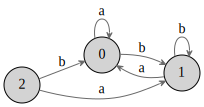

In [2]:
%%automaton a
context = "lal_char(ab), b"
0 -> 0 a
0 -> 1 b
1 -> 0 a
1 -> 1 b
2 -> 0 b
2 -> 1 a

# Synchronization checks

We can check that $\mathcal{A}$ is synchronizing:

In [3]:
a.is_synchronizing()

True

We can guess from the figure that $aa$ is a synchronizing word of $\mathcal{A}$. We can verify that with ``is_synchronized_by``:

In [4]:
a.is_synchronized_by('aa')

True

# Algorithms

To find a short synchronizing word, we need to use the ``synchronizing_word()`` method, which takes an algorithm in paramater.
The default algorithm is ``greedy``, when no algorithm is specified.

In [5]:
a = c.cerny(4)

## Greedy

Eppstein's greedy is a $O(n^3)$ greedy algorithm which always synchronizes the closest pair first.
It can be called using ``synchronizing_word('greedy')`` or ``synchronizing_word('eppstein')``

In [6]:
a.synchronizing_word('greedy')

baababaaab

## Cycle

Cycle is a $O(n^3)$ algorithm similar to Greedy, which ensures that the pair synchronized contains the latest singleton in which the synchronization previously took place. This is less efficient in the general case but gives optimal results ($(n - 1)^2$) for Černý automata.

In [7]:
a.synchronizing_word('cycle')

baaabaaab

## SynchroP & SynchroPL

SynchroP is a "one-step ahead" heuristic with a $O(n^5)$ time complexity that checks the distance of the new active states from $q_0$ after synchronizing a specific pair, and tries to minimize the sum of these distances.

In [8]:
a.synchronizing_word('synchrop')

baaabaaab

SynchroPL is similar to SynchroP but adds the distance of the synchronized pair as a "cost" in the heuristic. Its time complexity is also $O(n^5)$.

In [9]:
a.synchronizing_word('synchropl')

baaabaaab

## FastSynchro

FastSynchro finds labels that reduces the new distances of the active states when appended to the synchronizing word. To guarantee that the algorithm terminates, it is only used if the label reduces the overall distance. If not, a bounded SynchroPL heuristic is used. The complexity of this algorithm is $O(n^3)$.

In [10]:
a.synchronizing_word('fastsynchro')

baaabaaab

# Synchronizing words for transducers

All the algorithms can also be used with k-tapes transducers:

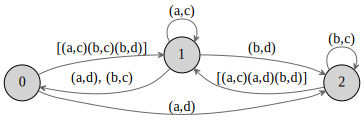

In [11]:
t = vcsn.automaton('''digraph
{
  vcsn_context = "lat<lal_char(ab), lal_char(cd)>, b"
  rankdir = LR
  {
    node [shape = circle]
    0
    1
    2
  }
  0 -> 1 [label = "(a,c), (b,c), (b,d)"]
  0 -> 2 [label = "(a,d)"]
  1 -> 0 [label = "(a,d), (b,c)"]
  1 -> 1 [label = "(a,c)"]
  1 -> 2 [label = "(b,d)"]
  2 -> 1 [label = "(a,c), (a,d), (b,d)"]
  2 -> 2 [label = "(b,c)"]
}''')
t

In [12]:
t.synchronizing_word()

(a,c)

In [13]:
t.is_synchronized_by(t.synchronizing_word('fastsynchro'))

True

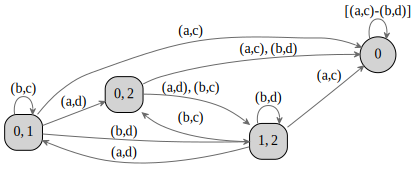

In [14]:
t.pair()